In [41]:
import pandas as pd
db = pd.read_pickle('Database.pkl')[['bdate', 'city', 'life_main', 'people_main', 'political', 'relation', 'smoking', 'is_liker', 'is_reposter', 'group_id', 'segment', 'alcohol']]
# db.head()
# db.query("city == 'Санкт-Петербург' and segment == 'Аниме'").mode()
# db['bdate'] = pd.to_datetime(db['bdate'], errors = 'coerce', yearfirst = True).year()
b = db.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
b.head()
# a = db.sample(n = 100)
# # result = pd.to_pickle('')
# # db['bdate'].head()
b.to_pickle('test_case.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115730 entries, 14 to 3289761
Data columns (total 12 columns):
bdate          71700 non-null float64
city           115730 non-null object
life_main      115730 non-null category
people_main    115730 non-null category
political      115730 non-null category
relation       115730 non-null category
smoking        115730 non-null category
is_liker       115730 non-null category
is_reposter    115730 non-null category
group_id       115730 non-null int64
segment        115730 non-null object
alcohol        115730 non-null float64
dtypes: category(7), float64(2), int64(1), object(2)
memory usage: 6.1+ MB
col_0
count    115730
dtype: int64 

(15, 1) 



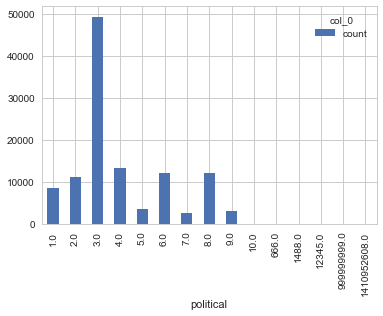

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_pickle('test_case.pkl')
df['bdate'] = pd.to_datetime(df['bdate'], errors = 'coerce', yearfirst = True)
df['bdate'] =df['bdate'].dt.year

df['life_main'] = pd.Categorical(df.life_main) 
df['people_main'] = pd.Categorical(df.people_main) 
df['political'] = pd.Categorical(df.political) 
df['relation'] = pd.Categorical(df.relation) 
df['smoking'] = pd.Categorical(df.smoking) 
df['is_liker'] = pd.Categorical(df.is_liker) 
df['is_reposter'] = pd.Categorical(df.is_reposter)    
df.info()

# for i in list(df):
#     a = df['{}'.format(i)].value_counts(normalize=True)*100
#     print(a)

pd.get_dummies(df, columns=['people_main', 'political'])

my_tab = pd.crosstab(index = df["political"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()
print (my_tab.sum(), "\n")
print (my_tab.shape, "\n")
my_tab.iloc[1:7] 
df = df.head(100)


In [43]:
my_tab/my_tab.sum()*100


col_0,count
political,
1.000000e+00,7.373196
2.000000e+00,9.567096
3.000000e+00,42.638901
4.000000e+00,11.438694
5.000000e+00,3.122786
6.000000e+00,10.472652
7.000000e+00,2.233647
8.000000e+00,10.445001
9.000000e+00,2.690746


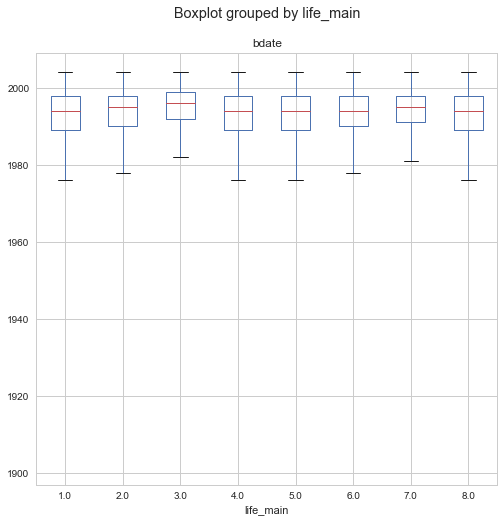

In [44]:
df.boxplot(column="bdate",        # Column to plot
                 by= "life_main",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [26]:

for x in list(df):
    for y in reversed(list(df)):
        clarity_color_table = pd.crosstab(index=df["{}".format(x)], columns=df["{}".format(y)])
        print(clarity_color_table)
        print('**************************************************************************************************')



segment  Metal  Punks  Satan  Аниме  Гот  Кино  Хиппи  Эмо
bdate                                                     
1976.0       0      0      0      0    0     1      0    0
1977.0       0      1      0      0    0     1      0    0
1982.0       0      0      0      1    1     0      0    0
1988.0       0      0      0      0    0     1      0    1
1990.0       1      0      0      0    0     0      0    0
1991.0       0      0      0      0    0     2      0    0
1992.0       0      0      1      1    0     0      0    0
1994.0       1      0      0      0    2     0      0    0
1995.0       0      0      0      1    0     0      1    0
1996.0       0      0      0      2    0     0      0    0
1997.0       0      0      0      2    1     0      0    0
1998.0       0      0      0      0    0     2      0    1
1999.0       0      1      0      2    0     0      0    0
2000.0       0      0      0      0    0     0      0    1
2002.0       0      0      0      1    0     0      0   

segment                   Alisa  Metal  Punks  Satan  Аниме  Гот  Кино  Фурри  \
city                                                                            
Beijing                       0      0      1      0      0    0     0      0   
Berlin                        0      0      0      0      1    0     0      0   
Boston                        0      0      0      0      0    0     0      0   
Koblenz                       1      0      0      0      0    0     0      0   
Littleton                     0      0      0      1      0    0     0      0   
Los Angeles                   0      0      0      0      0    0     0      1   
Tokyo                         0      0      0      0      1    0     0      0   
Warszawa                      0      0      0      1      0    0     0      0   
Washington, D.C.              0      0      0      0      0    0     1      0   
Алматы                        0      0      0      0      1    0     0      0   
Архангельск                 

city                      Beijing  Berlin  Boston  Koblenz  Littleton  \
city                                                                    
Beijing                         1       0       0        0          0   
Berlin                          0       1       0        0          0   
Boston                          0       0       1        0          0   
Koblenz                         0       0       0        1          0   
Littleton                       0       0       0        0          2   
Los Angeles                     0       0       0        0          0   
Tokyo                           0       0       0        0          0   
Warszawa                        0       0       0        0          0   
Washington, D.C.                0       0       0        0          0   
Алматы                          0       0       0        0          0   
Архангельск                     0       0       0        0          0   
Баку                            0       0       0  

city       Beijing  Berlin  Boston  Koblenz  Littleton  Los Angeles  Tokyo  \
life_main                                                                    
1.0              0       0       0        0          0            0      0   
3.0              0       0       0        0          0            0      0   
5.0              0       0       0        0          1            0      0   
6.0              0       0       0        0          0            0      0   
7.0              0       0       0        0          0            0      0   

city       Warszawa  Washington, D.C.  Алматы   ...     Санкт-Петербург  \
life_main                                       ...                       
1.0               0                 0       0   ...                   0   
3.0               0                 0       0   ...                   0   
5.0               0                 0       0   ...                   0   
6.0               0                 1       0   ...                   0   
7.0

city       Beijing  Berlin  Boston  Koblenz  Littleton  Los Angeles  Tokyo  \
political                                                                    
1.0              0       0       0        0          0            0      0   
3.0              0       0       0        0          0            0      0   
6.0              0       0       0        0          0            0      0   
8.0              0       0       0        0          0            0      0   
9.0              0       0       0        0          0            0      0   

city       Warszawa  Washington, D.C.  Алматы   ...     Санкт-Петербург  \
political                                       ...                       
1.0               0                 0       0   ...                   0   
3.0               0                 0       0   ...                   0   
6.0               0                 0       0   ...                   0   
8.0               0                 0       0   ...                   0   
9.0

city      Beijing  Berlin  Boston  Koblenz  Littleton  Los Angeles  Tokyo  \
relation                                                                    
0.0             0       0       0        0          1            0      0   
1.0             0       0       0        0          0            0      0   
2.0             0       1       0        0          0            0      0   
3.0             0       0       0        0          0            0      0   
4.0             0       0       0        0          0            0      0   
5.0             0       0       0        0          0            0      0   
6.0             0       0       0        0          0            0      0   

city      Warszawa  Washington, D.C.  Алматы   ...     Санкт-Петербург  \
relation                                       ...                       
0.0              0                 1       0   ...                   0   
1.0              0                 0       0   ...                   0   
2.0       

city     Beijing  Berlin  Boston  Koblenz  Littleton  Los Angeles  Tokyo  \
smoking                                                                    
1.0            0       0       0        0          0            0      0   
2.0            0       0       0        0          0            0      0   
3.0            0       0       0        0          1            0      0   
4.0            0       0       0        0          0            0      0   
5.0            0       0       0        0          0            0      0   

city     Warszawa  Washington, D.C.  Алматы   ...     Санкт-Петербург  \
smoking                                       ...                       
1.0             0                 0       0   ...                   0   
2.0             0                 0       0   ...                   0   
3.0             0                 0       0   ...                   0   
4.0             0                 0       0   ...                   0   
5.0             0            

group_id   383        22531      175802     1026638    1090630    1446943    \
group_id                                                                      
383                3          0          0          0          0          0   
22531              0          3          0          0          0          0   
175802             0          0          3          0          0          0   
1026638            0          0          0          1          0          0   
1090630            0          0          0          0         10          0   
1446943            0          0          0          0          0          1   
4593390            0          0          0          0          0          0   
15609452           0          0          0          0          0          0   
23441154           0          0          0          0          0          0   
25240087           0          0          0          0          0          0   
27720440           0          0          0          

group_id  383        22531      175802     1026638    1090630    1446943    \
segment                                                                      
Alisa             3          0          0          0          0          0   
Metal             0          0          0          0          0          0   
Punks             0          0          0          0          0          0   
Satan             0          0          0          0          0          1   
Аниме             0          0          0          0          0          0   
Гот               0          0          0          0          0          0   
Кино              0          0          3          0         10          0   
Фурри             0          0          0          0          0          0   
Хиппи             0          3          0          0          0          0   
Эмо               0          0          0          1          0          0   

group_id  4593390    15609452   23441154   25240087     ...    

In [45]:
clarity_color_table = pd.crosstab(index=df['political'], columns=df['smoking'])
clarity_color_table


smoking,1.0,2.0,3.0,4.0,5.0
political,,,,,
1.000000e+00,2496,1560,1015,2168,1294
2.000000e+00,3663,2441,1242,2560,1166
3.000000e+00,14959,11966,5002,13184,4235
4.000000e+00,3085,2738,1870,4037,1508
5.000000e+00,989,802,552,913,358
6.000000e+00,3068,2303,1850,3296,1603
7.000000e+00,618,435,373,627,532
8.000000e+00,2865,2311,1904,3610,1398
9.000000e+00,704,543,427,884,556


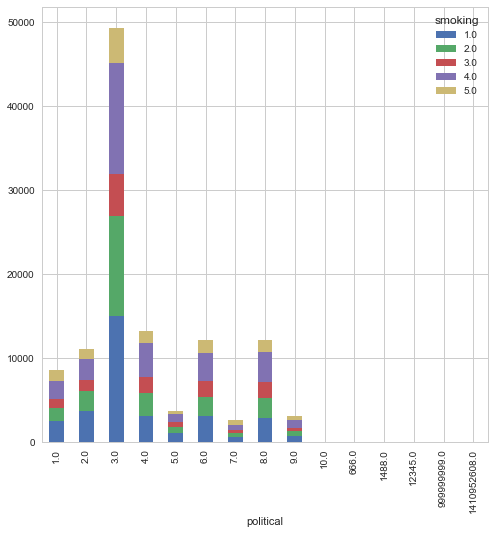

In [46]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

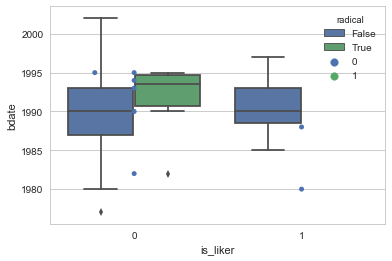

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

sns.swarmplot(x=df['political'], y=df['bdate'], hue = df['is_liker'])

df["radical"] = df["political"].isin(["1", "7"])
sns.boxplot(x=df['is_liker'], y=df['bdate'], hue=df["radical"])
